#### Exploratory Data Analysis 


| Question | variable |
| -- | :--: |
| How old are you?	| Q01 |
| What is your current Job?	| Q02 |
| Job Title	| Q03 |
| What level?	| Q04 |
| What is your highest educational attainment? *refers to the level you graduated from	| Q05 |
| Sex	| Q06 |
| Gender identification	| Q07 |
| Location (region)	| Q08 |
| What device are you using to access the social media?     	| Q09 |
| What led you to visit the page?	| Q10 |
| What is your priority reproductive health need right now?	| Q11 |
| What do you think are the benefits of using family planning?	| Q12 |
| What platform(s) did you visit?	| Q13 |
| How often do you visit family planning and reproductive health social media contents?	| Q14 |
| How did you learn about AskMara Facebook account?	| Q15 | 
| What type of posts were you able to like in terms of contents? (multiple entries)	| Q16 |
| What type of posts were you able to like in terms of visuals/audio?  (multiple entries)	| Q17 |
| Are you aware of the chatbot embedded in the page?	| Q18 |
| Will the information you saw on this Facebook page help you decide on your use of contraception?	| Q19 |
| Yes, I will consider the use of contraception	| Q20 |
| Yes it is helpful, but I do not consider using contraception now because:	| Q21 |
| How likely are you to recommend the information to your friends/ peers?	| Q22 | 
| In the past three months, were you able to visit other social media accounts/sites related to family planning and reproductive health? | Q23 |
| What social media platforms?	| Q24 | 
| Were you able to utilize and contact the chatbot embedded in the page?	| Q25 |
| Have you visited a facility for family planning consultation/counselling?	| Q26 |
| Who provided the consultation/ counselling?	| Q27 |
| Were you able to avail commodity/services?	| Q28 |
| What method/ commodity/ services have you taken? And where? | Q29 |
| What Services/procedures?	| Q30 |
| Why did you not visit a facility?	| Q31 |
| How likely are you to continue the use of your chosen method?	| Q32 |
| How satisfied are you regarding your chosen method?	| Q33 |
| Did you find the digital platform helpful to your family planning journey?	| Q34 |
| What is the reason for not availing? | Q35 |
| Which FB page largely contributed to address your family planning and reproductive health needs?	| Q36|

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [34]:
plt.rc("font", size=8)
sns.set_theme(style="white")
sns.set_theme(style="whitegrid", color_codes=True)

Combine the two files

In [35]:
temp1 = pd.DataFrame()
temp2 = pd.DataFrame()

In [36]:

cpd_data = pd.read_csv("cpd.csv")

print(cpd_data.shape)
#print(cpd_data.columns)

cpd_data = cpd_data.dropna(subset=['23. Yes, I will consider the use of contraception \n\n*Natural (abstinence, withdrawal, calendar method, etc.)\n*Modern (oral pills, condoms, injectables, IUD, implant, ligation, vasectomy, etc.)'])
# removing those who did not respond to question 23 - the conversion3 value 

temp1['Q01'] = cpd_data['6. How old are you? ']
temp1['Q02'] = cpd_data['7. What is your current job?']
temp1['Q03'] = cpd_data['7. What is your current job?'] # Job Title
temp1['Q04'] = cpd_data['What level? '] 
temp1['Q05'] = cpd_data['educ']
temp1['Q06'] = cpd_data['female']
temp1['Q07'] = cpd_data['genderid']
temp1['Q08'] = cpd_data['loc']
temp1['Q09'] = cpd_data['devices']
temp1['Q10'] = cpd_data['purpose page']
temp1['Q11'] = cpd_data['perceived rh needs']
temp1['Q12'] = cpd_data['benefitnum']
temp1['Q13'] = cpd_data['16. What platform(s) did you visit? '].astype(str) + 'CPD' # to check / to be padded
temp1['Q14'] = cpd_data['oftenvisit'] # to check
temp1['Q15'] = cpd_data['learnpage1'].astype(str) + 'CPD' # to check
temp1['Q16'] = cpd_data['contents']
temp1['Q17'] = cpd_data['visuals']
temp1['Q18'] = cpd_data['21. Are you aware of the hotline embedded in the page? '].astype(str) + 'CPD' # different for each tool
temp1['Q19'] = cpd_data['22. Will the information you saw on this Facebook page help you decide on your use of contraception? ']
temp1['Q20'] = cpd_data['23. Yes, I will consider the use of contraception \n\n*Natural (abstinence, withdrawal, calendar method, etc.)\n*Modern (oral pills, condoms, injectables, IUD, implant, ligation, vasectomy, etc.)']
temp1['Q21'] = cpd_data['23. Yes it is helpful, but I do not consider using contraception now because: ']
temp1['Q22'] = cpd_data['24. How likely are you to recommend the information to your friends/peers? '].astype(str) # to check
temp1['Q23'] = cpd_data['In the past three months, were you able to visit other social media sites/pages related to Family Planning and Reproductive Health? ']
temp1['Q24'] = cpd_data['What social media platforms? ']
temp1['Q25'] = cpd_data['Were you able to utilize and contact the hotline embedded in the page? '].astype(str) + 'CPD' # different for each tool
temp1['Q26'] = cpd_data['conversion1'] # conversion1 
temp1['Q27'] = cpd_data['Who provided the consultation/counselling? ']
temp1['Q28'] = cpd_data['conversion2'] # conversion2
temp1['Q29'] = cpd_data['conversion3'] # conversion3
temp1['Q30'] = cpd_data['What type of services/procedures? '] # to check
temp1['Q31'] = cpd_data['If no, why did you not visit a facility? '] # to check
temp1['Q32'] = cpd_data['How likely are you to continue the use of your chosen method? '] # to check
temp1['Q33'] = cpd_data['How satisfied are you regarding your chosen method? '] # to check
temp1['Q34'] = cpd_data['Did you find the digital platform helpful to your family planning journey?'] # to check
temp1['Q35'] = ' '
temp1['Q36'] = cpd_data['Which Facebook page largely contributed to address your Family Planning and Reproductive Health needs? ']


temp1['private_'] = cpd_data['What facility? ']
temp1['private'] = temp1['private_'].apply(lambda x: 1 if x == 'Private clinic (Pribadong klinika)' else 0 )
temp1.drop(columns=['private_'], inplace=True)

temp1['conversion3_'] = cpd_data['23. Yes, I will consider the use of contraception \n\n*Natural (abstinence, withdrawal, calendar method, etc.)\n*Modern (oral pills, condoms, injectables, IUD, implant, ligation, vasectomy, etc.)']
temp1['conversion3'] = temp1['conversion3_'].apply(lambda x: 1 if x == 'Modern (Makabago)' else 0 )
temp1.drop(columns=['conversion3_'], inplace=True)
# here, conversion3 is 1 only if Modern is selected, if the respondent choosed none - that row and the answers are removed 


temp1['tag'] = 0
print(temp1.tail())

(650, 74)
     Q01                                            Q02  \
643   24  Rank-and-file employee (Karaniwang empleyado)   
644   18                           Student (Estudyante)   
645   25                      Managerial (Tagapamahala)   
646   20                           Student (Estudyante)   
649   26  Rank-and-file employee (Karaniwang empleyado)   

                                               Q03          Q04  Q05  Q06  \
643  Rank-and-file employee (Karaniwang empleyado)          NaN    1    1   
644                           Student (Estudyante)  High School    4    1   
645                      Managerial (Tagapamahala)          NaN    1    1   
646                           Student (Estudyante)  High School    2    1   
649  Rank-and-file employee (Karaniwang empleyado)          NaN    1    1   

     Q07  Q08  Q09  Q10  ...  Q30  Q31  Q32  Q33  Q34  Q35  Q36 private  \
643    4    1    1    1  ...  NaN  NaN  NaN  NaN  NaN       NaN       0   
644    1    1    1    

In [37]:
conditions = [
    (temp1['Q02'] == 'Self-employed (Nagtatrabaho para sa sarili)'),
    (temp1['Q02'] == 'Rank-and-file employee (Karaniwang empleyado)'),
    (temp1['Q02'] == 'Managerial (Tagapamahala)'),
    (temp1['Q02'] == 'Unemployed (Walang trabaho)'),
    (temp1['Q02'] == 'Student (Estudyante)')
    ]
values = [3,2,1,5,4] # Assuming Normal Distibution
temp1['Q02']= np.select(conditions,values)
temp1['Q03'] = temp1['Q02']

temp1['Q02'].head()

0    3
1    2
2    2
4    2
5    2
Name: Q02, dtype: int32

In [38]:

Bayer_data = pd.read_csv("Bayer.csv")

print(Bayer_data.shape)
#print(Bayer_data.columns)
Bayer_data = Bayer_data.dropna(subset=['Yes, I will consider the use of contraception'])

temp2['Q01'] = Bayer_data['How old are you?']
temp2['Q02'] = Bayer_data['What is your current Job?']
temp2['Q03'] = Bayer_data['Job Title']
temp2['Q04'] = Bayer_data['What level?']
temp2['Q05'] = Bayer_data['Educ']
temp2['Q06'] = Bayer_data['Female']
temp2['Q07'] = Bayer_data['GenderID']
temp2['Q08'] = Bayer_data['Loc']
temp2['Q09'] = Bayer_data['Devices']
temp2['Q10'] = Bayer_data['Purpose Page']
temp2['Q11'] = Bayer_data['perceived rh needs']
temp2['Q12'] = Bayer_data['Benefit Number']
temp2['Q13'] = Bayer_data['What platform(s) did you visit?'].astype(str) + 'Bayer' # needs to be padded
temp2['Q14'] = Bayer_data['Often Visit']
temp2['Q15'] = Bayer_data['How did you learn about AskMara Facebook account?'].astype(str) + 'Bayer' # to be padded
temp2['Q16'] = Bayer_data['Contents']
temp2['Q17'] = Bayer_data['Visuals']
temp2['Q18'] = Bayer_data['Are you aware of the chatbot embedded in the page?'].astype(str) + 'Bayer' # to be padded
temp2['Q19'] = Bayer_data['Will the information you saw on this Facebook page help you decide on your use of contraception?']
temp2['Q20'] = Bayer_data['Yes, I will consider the use of contraception']
temp2['Q21'] = Bayer_data['Will the information you saw on this Facebook page help you decide on your use of contraception?']
temp2['Q22'] = Bayer_data['How likely are you to recommend the information to your friends/ peers?'].astype(str)
temp2['Q23'] = Bayer_data['Social']
temp2['Q24'] = Bayer_data['number of socials']
temp2['Q25'] = Bayer_data['chatbot'].astype(str) + 'Bayer' # to be padded 
#temp2['Q26'] = Bayer_data['Conversion 1']
temp2['Q27'] = Bayer_data['Who provided the consultation/ counselling?']
temp2['Q28'] = Bayer_data['Conversion 2']
temp2['Q29'] = Bayer_data['Conversion 3']
temp2['Q30'] = Bayer_data['What Services/procedures?']
temp2['Q31'] = Bayer_data['Why did you not visit a facility?']
temp2['Q32'] = Bayer_data['How likely are you to continue the use of your chosen method?']
temp2['Q33'] = Bayer_data['How satisfied are you regarding your chosen method?']
temp2['Q34'] = Bayer_data['Did you find the digital platform helpful to your family planning journey?']
temp2['Q35'] = Bayer_data['What is the reason for not availing? ']
temp2['Q36'] = Bayer_data['Which FB page largely contributed to address your family planning and reproductive health needs?']


temp2['conversion3_'] = Bayer_data['Yes, I will consider the use of contraception']
temp2['conversion3'] = temp2['conversion3_'].apply(lambda x: 1 if x == 'Modern' else 0 )
temp2.drop(columns=['conversion3_'], inplace=True)




temp2['private_'] = Bayer_data['What facility?']
temp2['private'] = temp2['private_'].apply(lambda x: 1 if x == 'Private clinic' else 0 )
temp2.drop(columns=['private_'], inplace=True)


temp2['tag'] = 1
print(temp2.tail())

(495, 101)
     Q01            Q02  Q03  Q04  Q05  Q06  Q07  Q08  Q09  Q10  ...  Q30  \
490   24  Self Employed    3  NaN    3    1    1    4    1    2  ...  NaN   
491   19     Unemployed    5  NaN    5    1    1    2    1    2  ...  NaN   
492   35  Self Employed    3  NaN    3    0    2    4    1    2  ...  NaN   
493   30     Unemployed    5  NaN    4    0    2    1    0    4  ...  NaN   
494   34  Self Employed    3  NaN    1    1    1    1    1    2  ...  NaN   

     Q31  Q32  Q33  Q34                                                Q35  \
490  NaN  5.0  5.0  5.0                                                NaN   
491  NaN  NaN  NaN  NaN                            I need more information   
492  NaN  5.0  5.0  5.0                                                NaN   
493  NaN  NaN  NaN  NaN  I have other personal reasons (cultural practi...   
494  NaN  NaN  NaN  NaN             I could not afford my preferred method   

                          Q36 conversion3 private tag  
4

In [39]:
# NOTE: Bayer data has 6 options / CPD has 5

print(temp2['Q02'].head())
print()
conditions = [
    (temp2['Q02'] == 'Self Employed'),
    (temp2['Q02'] == 'Rank-and-file employee'),
    (temp2['Q02'] == 'Manager'),
    (temp2['Q02'] == 'Unemployed'),
    (temp2['Q02'] == 'Student'),
    (temp2['Q02'] == 'Supervisor')
    ]
values = [3,2,1,5,4,1] # Assuming Normal Distibution
temp2['Q02']= np.select(conditions,values)
temp2['Q03'] = temp2['Q02']

temp2['Q02'].head()

0    Rank-and-file employee
1                   Student
3    Rank-and-file employee
4             Self Employed
5                   Manager
Name: Q02, dtype: object



0    2
1    4
3    2
4    3
5    1
Name: Q02, dtype: int32

Merge both dataframe

In [40]:
cdata1 = pd.concat([temp1, temp2], ignore_index=True)
#cdata1 = cdata1.dropna()

print(cdata1.head())
print(cdata1.shape)

   Q01  Q02  Q03  Q04  Q05  Q06  Q07  Q08  Q09  Q10  ...       Q30  \
0   34    3    3  NaN    2    1    1    1    1    1  ...       NaN   
1   25    2    2  NaN    2    1    3    1    1    1  ...  Ligation   
2   32    2    2  NaN    3    1    1    1    1    2  ...       NaN   
3   31    2    2  NaN    1    1    1    1    1    3  ...       NaN   
4   24    2    2  NaN    1    1    1    1    1    1  ...       NaN   

                                                 Q31  \
0  I need more information (Kailangan ko ng mas m...   
1                                                NaN   
2  I could not find a contraceptive method that m...   
3  I need more information (Kailangan ko ng mas m...   
4  I have other personal reasons (cultural practi...   

                                                 Q32  \
0                                        3 - Neutral   
1  5 - Very likely to continue (Napakamalamang na...   
2  5 - Very likely to continue (Napakamalamang na...   
3  5 - Very likely

In [41]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
temp = pd.DataFrame()

### Modern Methods

#### Demographics

Total respondents at the third conversion: **827**

Removing all respondents except those who availed private services

In [42]:
print(cdata1.shape)
condition = cdata1['private'] == 1
cdata1 = cdata1[~~condition]
print(cdata1.head())
print(cdata1.shape)
cdata1.drop(columns=['private'], inplace=True)

(943, 39)
    Q01  Q02  Q03  Q04  Q05  Q06  Q07  Q08  Q09  Q10  ...      Q30  Q31  \
8    26    1    1  NaN    1    0    3    2    1    3  ...      NaN  NaN   
14   36    3    3  NaN    3    1    1    1    1    2  ...      NaN  NaN   
37   34    2    2  NaN    1    1    4    1    1    1  ...  Implant  NaN   
40   19    2    2  NaN    5    1    1    1    1    1  ...      NaN  NaN   
42   25    2    2  NaN    1    0    2    2    1    1  ...      NaN  NaN   

                                                  Q32  \
8   5 - Very likely to continue (Napakamalamang na...   
14                                        3 - Neutral   
37    4 - Likely to continue (Malamang na magpatuloy)   
40  5 - Very likely to continue (Napakamalamang na...   
42                                                NaN   

                                                  Q33  \
8           5 - Very satisfied (Lubos na nasisiyahan)   
14  4 - Moderately satisfied (Katamtaman ang kasiy...   
37  4 - Moderately satisf

from 943 respondents, only **210** availed private hcp

In [43]:
print(cdata1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 8 to 935
Data columns (total 38 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Q01          210 non-null    int64  
 1   Q02          210 non-null    int32  
 2   Q03          210 non-null    int32  
 3   Q04          29 non-null     object 
 4   Q05          210 non-null    int64  
 5   Q06          210 non-null    int64  
 6   Q07          210 non-null    int64  
 7   Q08          210 non-null    int64  
 8   Q09          210 non-null    int64  
 9   Q10          210 non-null    int64  
 10  Q11          210 non-null    int64  
 11  Q12          210 non-null    int64  
 12  Q13          210 non-null    object 
 13  Q14          210 non-null    int64  
 14  Q15          210 non-null    object 
 15  Q16          210 non-null    int64  
 16  Q17          210 non-null    int64  
 17  Q18          210 non-null    object 
 18  Q19          210 non-null    object 
 19  Q20          

NOTE: Drop question 4, 30 and 31

In [44]:
cdata1.drop(columns=['Q04'], inplace=True)
cdata1.drop(columns=['Q30'], inplace=True)
cdata1.drop(columns=['Q31'], inplace=True)

cdata1.drop(columns=['Q26'], inplace=True)



In [45]:
temp['Q01'] = label_encoder.fit_transform(cdata1['Q01'].astype(str))
temp['Q02'] = label_encoder.fit_transform(cdata1['Q02'].astype(str))
temp['Q03'] = label_encoder.fit_transform(cdata1['Q03'].astype(str))
#temp['Q04'] = label_encoder.fit_transform(cdata1['Q04'].astype(str))
temp['Q05'] = label_encoder.fit_transform(cdata1['Q05'].astype(str))
temp['Q06'] = label_encoder.fit_transform(cdata1['Q06'].astype(str))
temp['Q07'] = label_encoder.fit_transform(cdata1['Q07'].astype(str))
temp['Q08'] = label_encoder.fit_transform(cdata1['Q08'].astype(str))
temp['Q09'] = label_encoder.fit_transform(cdata1['Q09'].astype(str))
temp['Q10'] = label_encoder.fit_transform(cdata1['Q10'].astype(str))
temp['Q11'] = label_encoder.fit_transform(cdata1['Q11'].astype(str))
temp['Q12'] = label_encoder.fit_transform(cdata1['Q12'].astype(str))
temp['Q13'] = label_encoder.fit_transform(cdata1['Q13'].astype(str))
temp['Q14'] = label_encoder.fit_transform(cdata1['Q14'].astype(str))
temp['Q15'] = label_encoder.fit_transform(cdata1['Q15'].astype(str))
temp['Q16'] = label_encoder.fit_transform(cdata1['Q16'].astype(str))
temp['Q17'] = label_encoder.fit_transform(cdata1['Q17'].astype(str))
temp['Q18'] = label_encoder.fit_transform(cdata1['Q18'].astype(str))
temp['Q19'] = label_encoder.fit_transform(cdata1['Q19'].astype(str))
temp['Q20'] = label_encoder.fit_transform(cdata1['Q20'].astype(str))
temp['Q21'] = label_encoder.fit_transform(cdata1['Q21'].astype(str))
temp['Q22'] = label_encoder.fit_transform(cdata1['Q22'].astype(str))
temp['Q23'] = label_encoder.fit_transform(cdata1['Q23'].astype(str))
temp['Q24'] = label_encoder.fit_transform(cdata1['Q24'].astype(str))
temp['Q25'] = label_encoder.fit_transform(cdata1['Q25'].astype(str))
#temp['Q26'] = label_encoder.fit_transform(cdata1['Q26'].astype(str))
temp['Q27'] = label_encoder.fit_transform(cdata1['Q27'].astype(str))
temp['Q28'] = label_encoder.fit_transform(cdata1['Q28'].astype(str))
temp['Q29'] = label_encoder.fit_transform(cdata1['Q29'].astype(str))
#temp['Q30'] = label_encoder.fit_transform(cdata1['Q30'].astype(str))
#temp['Q31'] = label_encoder.fit_transform(cdata1['Q31'].astype(str))
temp['Q32'] = label_encoder.fit_transform(cdata1['Q32'].astype(str))
temp['Q33'] = label_encoder.fit_transform(cdata1['Q33'].astype(str))
temp['Q34'] = label_encoder.fit_transform(cdata1['Q34'].astype(str))
temp['Q35'] = label_encoder.fit_transform(cdata1['Q35'].astype(str))
temp['Q36'] = label_encoder.fit_transform(cdata1['Q36'].astype(str))
temp['conversion3'] = label_encoder.fit_transform(cdata1['conversion3'])

##### Add only the demographics parameters

Visualize correlogram

<Figure size 1000x1000 with 0 Axes>

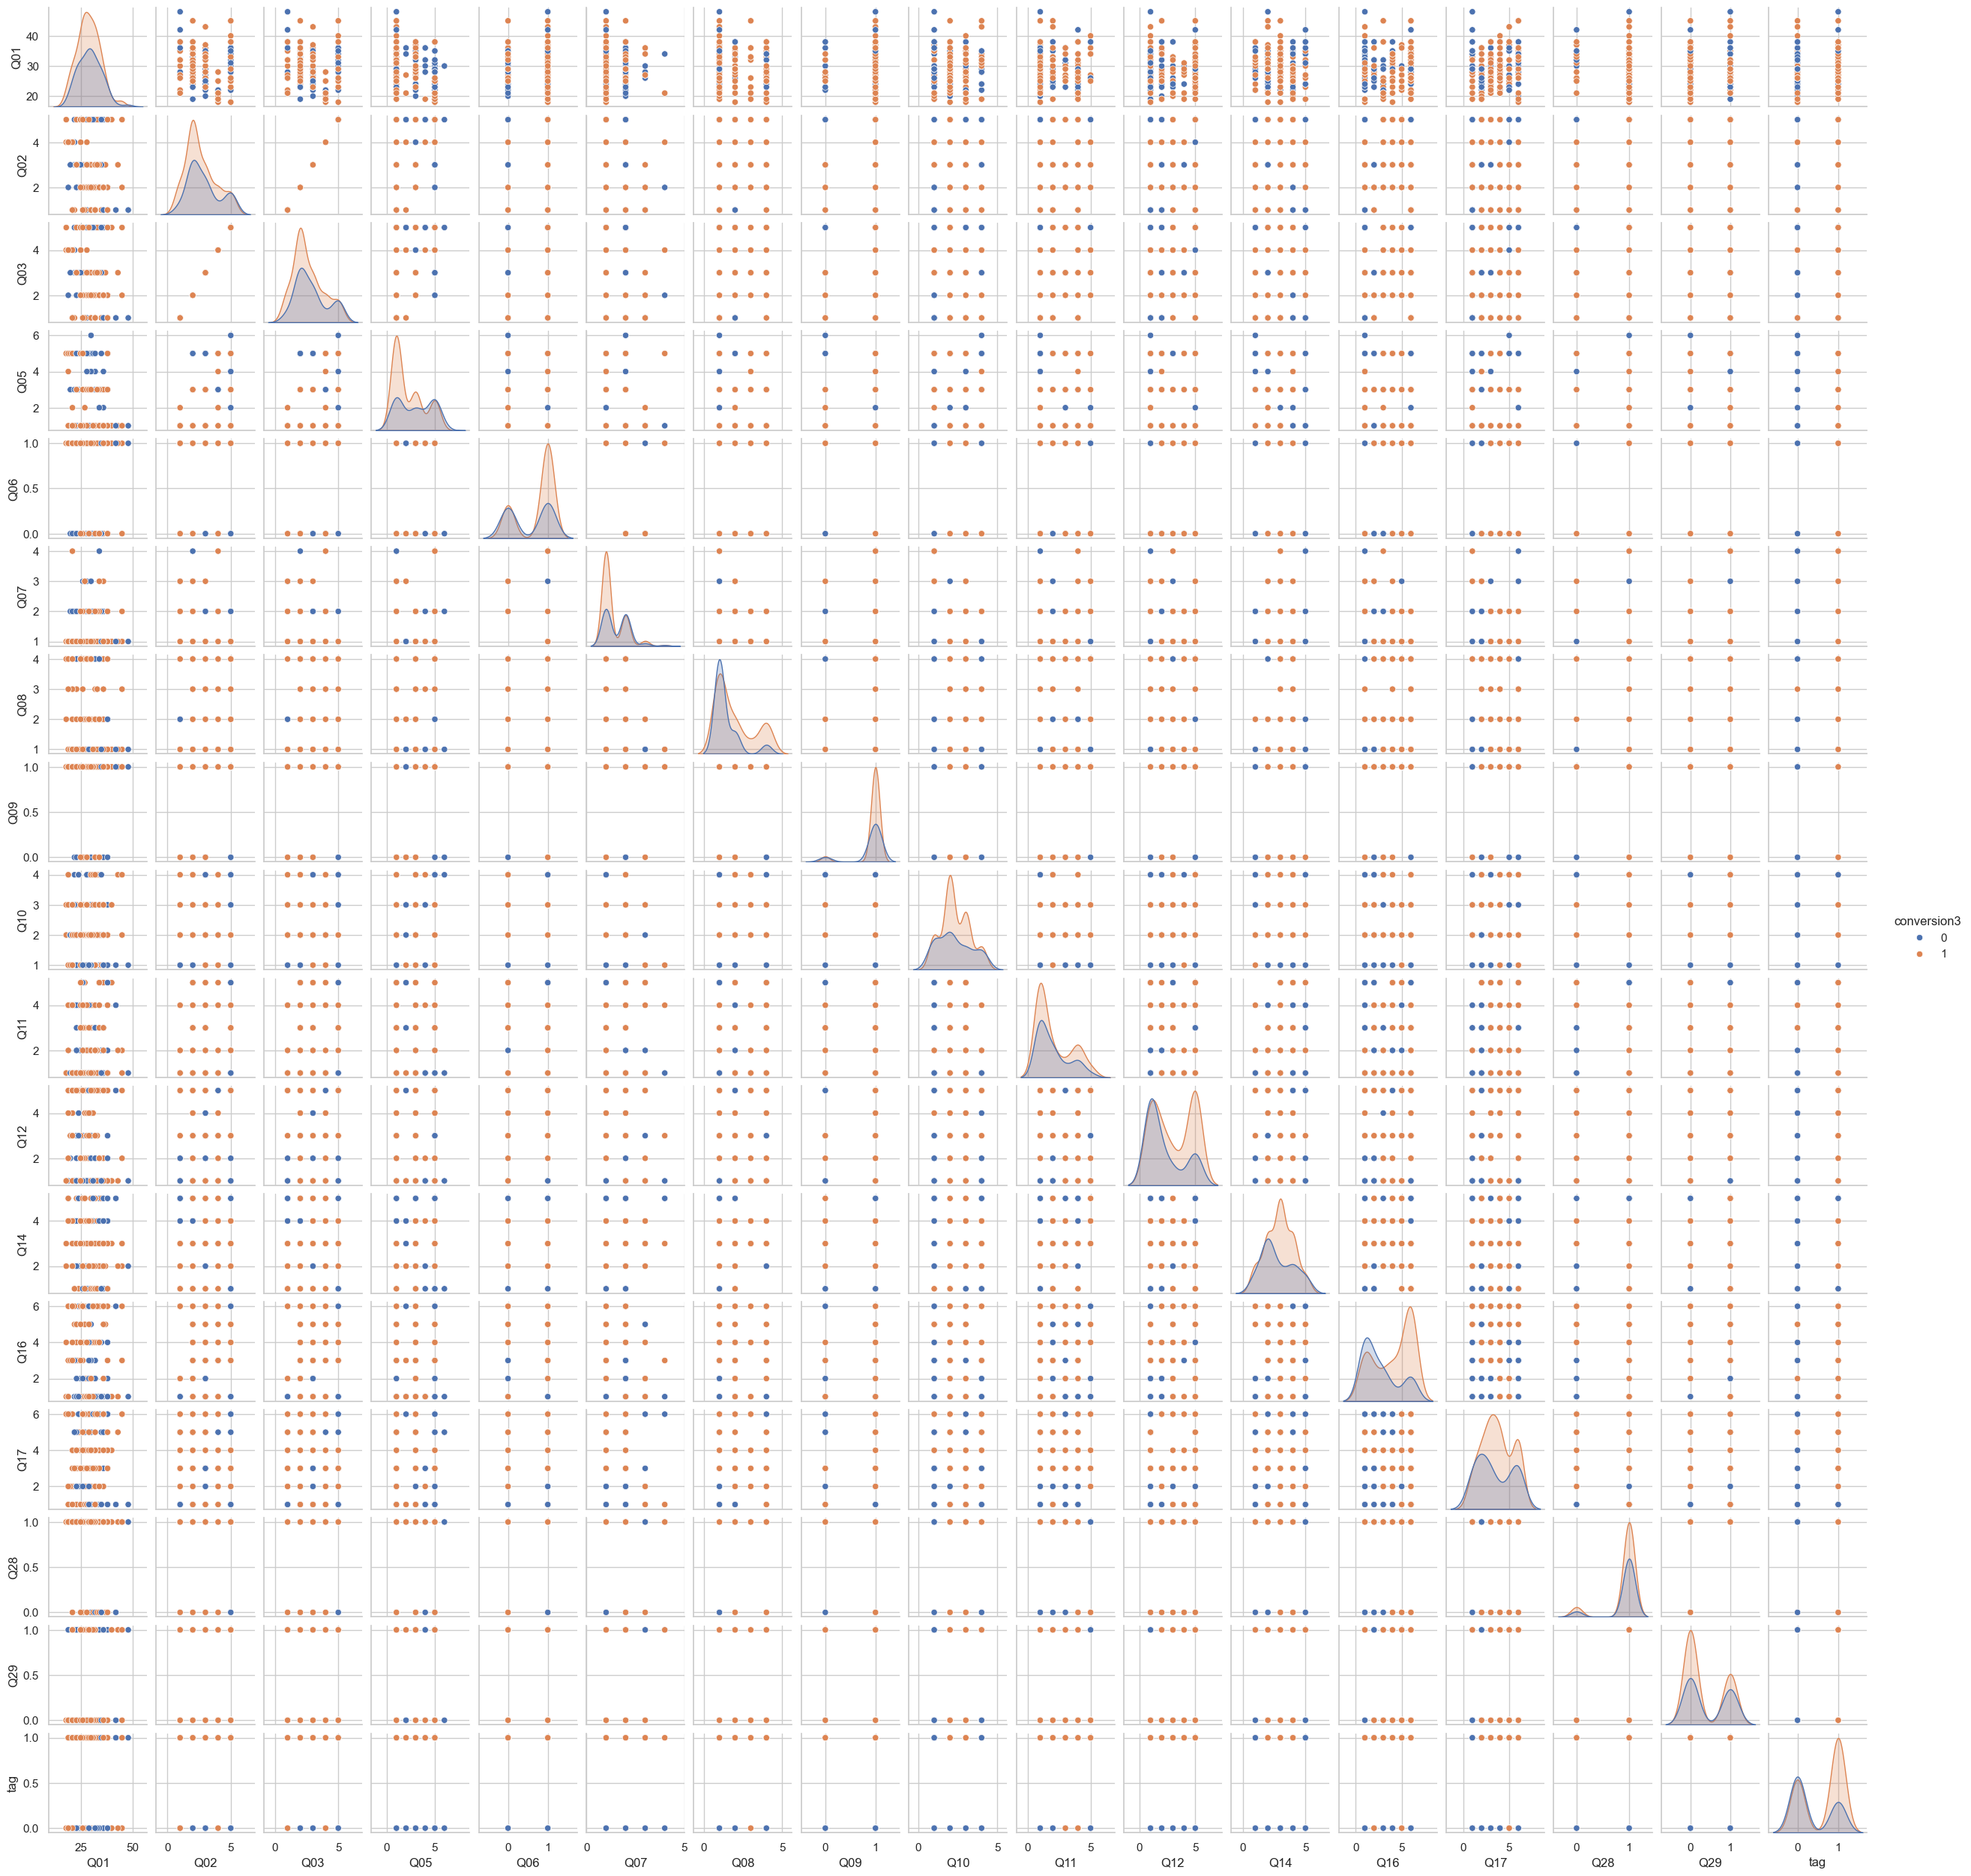

In [46]:
plt.figure(figsize=(10,10))
sns.pairplot(cdata1, hue='conversion3', height=1.5)

plt.show()

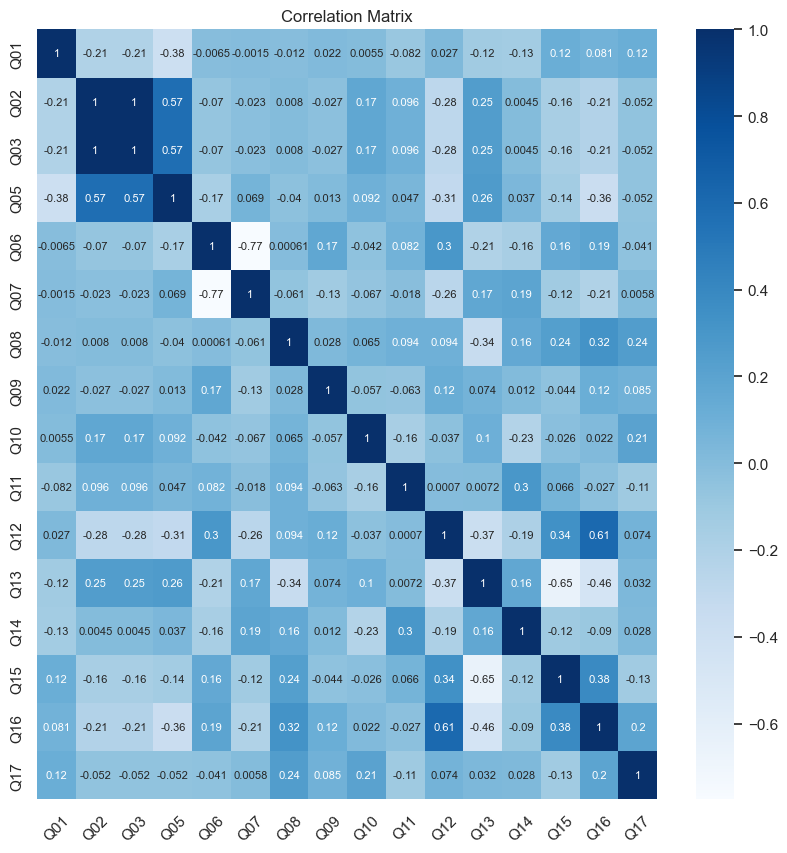

In [47]:
corr_matrix = temp.iloc[:,:16].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', annot_kws={"size":8})
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

##### Investigate missing values and uniqueness

Text(0.5, 1.0, 'Missing values heatmap')

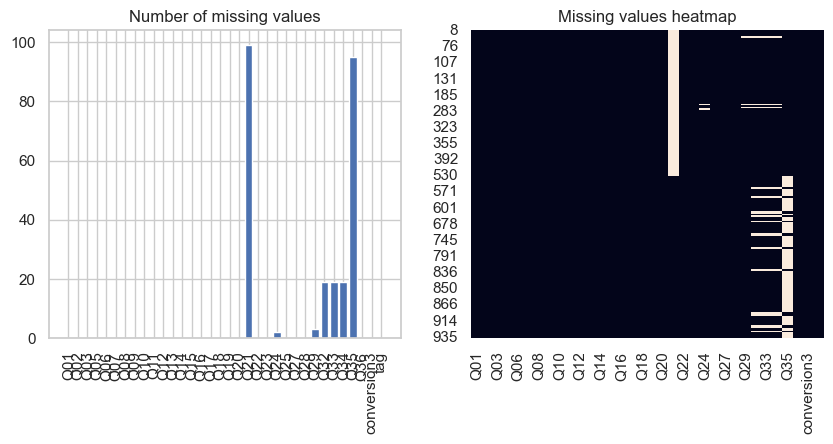

In [48]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.bar(cdata1.columns.values, cdata1.isnull().sum())
plt.xticks(rotation=90)
plt.title("Number of missing values")
plt.subplot(122)
sns.heatmap(cdata1.isnull(), cbar = False).set_title("Missing values heatmap")

In [49]:
N_val = cdata1.nunique()
print(N_val)
cdata1.fillna(0, inplace=True)

Q01            26
Q02             5
Q03             5
Q05             6
Q06             2
Q07             4
Q08             4
Q09             2
Q10             4
Q11             5
Q12             5
Q13            10
Q14             5
Q15            20
Q16             6
Q17             6
Q18             4
Q19             2
Q20             3
Q21             1
Q22             7
Q23             4
Q24            28
Q25             4
Q27             7
Q28             2
Q29             2
Q32             7
Q33             8
Q34             7
Q35             6
Q36             5
conversion3     2
tag             2
dtype: int64


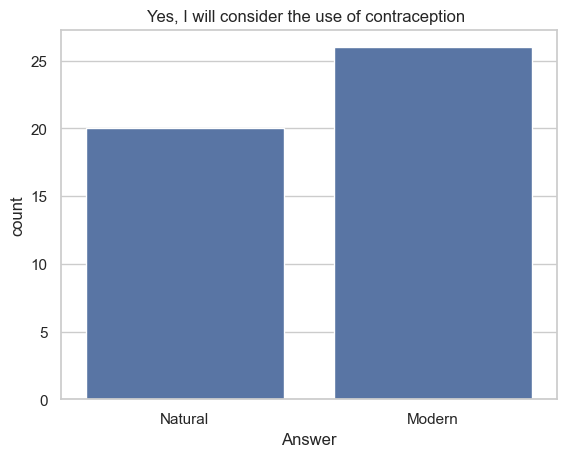

Natural - 20
Modern - 26


In [50]:
labels = ['Natural','Modern']
bins =[0,1,99]
temp['conversion3'] = pd.cut(cdata1['conversion3'], bins=bins, labels=labels, right=False)
sns.countplot(x='conversion3', data=temp)
plt.title(label='Yes, I will consider the use of contraception ')
plt.xlabel("Answer")
plt.show()

print("Natural - " + str (((temp['conversion3'] == 'Natural')).sum() ))
print("Modern - " + str (((temp['conversion3'] == 'Modern')).sum() ))
#cdata1['conversion3'] = temp['conversion3']


In [51]:
temp['Q01'] = label_encoder.fit_transform(cdata1['Q01'].astype(str))
temp['Q02'] = label_encoder.fit_transform(cdata1['Q02'].astype(str))
temp['Q03'] = label_encoder.fit_transform(cdata1['Q03'].astype(str))
#temp['Q04'] = label_encoder.fit_transform(cdata1['Q04'].astype(str))
temp['Q05'] = label_encoder.fit_transform(cdata1['Q05'].astype(str))
temp['Q06'] = label_encoder.fit_transform(cdata1['Q06'].astype(str))
temp['Q07'] = label_encoder.fit_transform(cdata1['Q07'].astype(str))
temp['Q08'] = label_encoder.fit_transform(cdata1['Q08'].astype(str))
temp['Q09'] = label_encoder.fit_transform(cdata1['Q09'].astype(str))
temp['Q10'] = label_encoder.fit_transform(cdata1['Q10'].astype(str))
temp['Q11'] = label_encoder.fit_transform(cdata1['Q11'].astype(str))
temp['Q12'] = label_encoder.fit_transform(cdata1['Q12'].astype(str))
temp['Q13'] = label_encoder.fit_transform(cdata1['Q13'].astype(str))
temp['Q14'] = label_encoder.fit_transform(cdata1['Q14'].astype(str))
temp['Q15'] = label_encoder.fit_transform(cdata1['Q15'].astype(str))
temp['Q16'] = label_encoder.fit_transform(cdata1['Q16'].astype(str))
temp['Q17'] = label_encoder.fit_transform(cdata1['Q17'].astype(str))
temp['Q18'] = label_encoder.fit_transform(cdata1['Q18'].astype(str))
temp['Q19'] = label_encoder.fit_transform(cdata1['Q19'].astype(str))
temp['Q20'] = label_encoder.fit_transform(cdata1['Q20'].astype(str))
#temp['Q21'] = label_encoder.fit_transform(cdata1['Q21'].astype(str))
temp['Q22'] = label_encoder.fit_transform(cdata1['Q22'].astype(str))
temp['Q23'] = label_encoder.fit_transform(cdata1['Q23'].astype(str))
temp['Q24'] = label_encoder.fit_transform(cdata1['Q24'].astype(str))
temp['Q25'] = label_encoder.fit_transform(cdata1['Q25'].astype(str))
#temp['Q26'] = label_encoder.fit_transform(cdata1['Q26'].astype(str))
temp['Q27'] = label_encoder.fit_transform(cdata1['Q27'].astype(str))
temp['Q28'] = label_encoder.fit_transform(cdata1['Q28'].astype(str))
temp['Q29'] = label_encoder.fit_transform(cdata1['Q29'].astype(str))
#temp['Q30'] = label_encoder.fit_transform(cdata1['Q30'].astype(str))
#temp['Q31'] = label_encoder.fit_transform(cdata1['Q31'].astype(str))
temp['Q32'] = label_encoder.fit_transform(cdata1['Q32'].astype(str))
temp['Q33'] = label_encoder.fit_transform(cdata1['Q33'].astype(str))
temp['Q34'] = label_encoder.fit_transform(cdata1['Q34'].astype(str))
temp['Q35'] = label_encoder.fit_transform(cdata1['Q35'].astype(str))
temp['Q36'] = label_encoder.fit_transform(cdata1['Q36'].astype(str))
temp['conversion3'] = label_encoder.fit_transform(cdata1['conversion3'])



X = temp[['Q02','Q03','Q05','Q06','Q07','Q08','Q09','Q10',
          'Q11','Q12','Q14','Q16','Q17','Q18','Q19',
          'Q22','Q23','Q25','Q27','Q28','Q29',  
          'Q32','Q33','Q34','Q35','Q36'
          ]]
y = temp['conversion3']

model = sm.Logit(y.astype(int), X.astype(int)) 
result = model.fit()  

print("\n\nFeatures vs Conversion 1:\n")
print(result.summary())

print('\nOdds Ratio:')
print(np.exp(result.params))

Optimization terminated successfully.
         Current function value: 0.496428
         Iterations 6


LinAlgError: Singular matrix